# Multinomial Logistic Regression

This is logistic regression when number of classes are more than 2.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Implementation

The gradient descent has the following steps:

1. Prepare your data
    - add intercept
    - $\mathbf{X}$ and $\mathbf{Y}$ and $\mathbf{W}$ in the right shape
        - $\mathbf{X}$ -> $(m, n)$
        - $\mathbf{Y}$ -> $(m, k)$
        - $\mathbf{W}$ -> $(n, k)$
        - where $k$ is number of classes
    - train-test split
    - feature scale
    - clean out any missing data
    - (optional) feature engineering
2. Predict using the softmax function
   $$ h = P(y = c \mid \boldsymbol{\theta}) = \frac{e^{\boldsymbol{\theta}^{T}_c\mathbf{x}}}{\Sigma_{i=1}^{k} e^{\boldsymbol{\theta}_k^{T}\mathbf{x}}}$$
   where c is the class
   
   --->why this function?<----
   - First, mathematically, this is just an extension of the sigmoid formula for multi-class classification
   - $e$ will always give non-negative outputs which helps, since probability is never negative
   - $e$ has a similar effect as argmax, which will turn larger input to larger outputs.
   - $e$ is super easy to differentiate, because derivative of $e$ is $e$
   - $e$ nicely cancel out the $\log$ in the cross entropy loss (see below)
   - By dividing, it make sure all the probability adds up to one.  You can think the softmax function as some form of normalization.   Why not normalization?  Because normalization cares only about proportion, while softmax reacts to change in scale better.

## Softmax function

In [2]:
def softmax(x):
    return np.exp(x) / np.sum(np.exp(x), axis=1, keepdims=True)

X = np.array([[1, 2, 3],
             [2, 4, 5]])

print("X: ", X.shape)  #(m, n) two samples, three features.  We ignore the y-intercept

#####important########
#note that Y in a multi-class classification is one-hot NOT class label
Y = np.array([[0, 0, 1, 0],
              [1, 0, 0, 0]])  #(m, k) let's say four classes

print("Y: ", Y.shape)

W = np.array([[1, 2, 3, 4],
              [2, 3, 1, 0],
              [1, 2, 5, 1],
              ])  #(n, k)  three features, four classes

print("W: ", W.shape)

print("X @ W:",  X @ W)  #X @ W should be the same shape as our y

print("softmax(X @ W):", softmax(X@W))

np.set_printoptions(suppress=True)
print("Try to confirm it adds up to 1:", softmax(X@W).sum(axis=1))

print("if I want to know which one is the answer, use argmax: ", np.argmax(softmax(X@W), axis=1))

X:  (2, 3)
Y:  (2, 4)
W:  (3, 4)
X @ W: [[ 8 14 20  7]
 [15 26 35 13]]
softmax(X @ W): [[6.12896865e-06 2.47260243e-03 9.97519014e-01 2.25472156e-06]
 [2.06089928e-09 1.23394576e-04 9.99876603e-01 2.78912388e-10]]
Try to confirm it adds up to 1: [1. 1.]
if I want to know which one is the answer, use argmax:  [2 2]


## Cross entropy loss

3. Calculate the loss using the cross entropy loss
    $$J = -\sum_{i=1}^m y^{(i)}\log(h^{(i)})$$
    
Note that this is no different with the previous binary cross entropy loss.  The binary cross entropy loss is now simply extended to multiclass

In [3]:
print("Y: ", Y)
print("h: ", softmax(X@W))
print("log: ", Y * np.log(softmax(X@W)))
print("log loss: ", -(Y * np.log(softmax(X@W))))
print("sum of log loss: ", np.sum(-(Y * np.log(softmax(X@W)))))

Y:  [[0 0 1 0]
 [1 0 0 0]]
h:  [[0.00000613 0.0024726  0.99751901 0.00000225]
 [0.         0.00012339 0.9998766  0.        ]]
log:  [[ -0.          -0.          -0.00248407  -0.        ]
 [-20.0001234   -0.          -0.          -0.        ]]
log loss:  [[ 0.          0.          0.00248407  0.        ]
 [20.0001234   0.          0.          0.        ]]
sum of log loss:  20.00260747339262


## Gradient

4. Calculate the gradient of theta of feature $j$ based on the loss function $J$
    - Suppose given 2 classes (k = 2) and 3 features (n = 3), first, our y will have shape of (sample, 2), where $y_1$ refers to the probability of the sample belonging to class 1, and $y_2$ is the probability of the sample belonging to class 2.  Here $y$ sums to 1.  We have the loss function as
       $$ J = -y_1 \log h_1 - y_2 \log h_2 $$
       where $h_1$ and $h_2$ are
       $$ h_1 = \frac{\exp(g_1)}{\exp(g_1)+\exp(g_2)} $$
       $$ h_2 = \frac{\exp(g_2)}{\exp(g_1)+\exp(g_2)} $$
       where $g_1$ and $g_2$ are
       $$ g_1 = w_{11}x_1 + w_{21}x_2 + w_{31}x_3 $$
       $$ g_2 = w_{12}x_1 + w_{22}x_2 + w_{32}x_3  $$
       where in $w_{ij}$, $i$ stands for feature and $j$ stands for class 
    - For example, to find the gradient of $J$ in respect to $w_{21}$, we simply can use the chain rule (or backpropagation) to calculate like this:
       $$ \frac{\partial J}{\partial w_{21}} = \frac{\partial J}{\partial h_{1}}\frac{\partial h_{1}}{\partial g_{1}}\frac{\partial g_{1}}{\partial w_{21}} + \frac{\partial J}{\partial h_{2}}\frac{\partial h_{2}}{\partial g_{1}}\frac{\partial g_{1}}{\partial w_{21}}$$
   - If we know each of them, it is easy, where
       $$\frac{\partial J}{\partial h_{1}} = -\frac{y_1}{h_1}$$
       $$\frac{\partial J}{\partial h_{2}} = -\frac{y_2}{h_2}$$
       $$\frac{\partial h_{1}}{\partial g_{1}} = \frac{\exp(g_{1})}{\exp(g_{1}) + \exp(g_{2})} - (\frac{\exp(g_1)}{\exp(g_1)+\exp(g_2)})^2 = h_1 (1 - h_1)$$
       $$\frac{\partial h_{2}}{\partial g_{1}} = \frac{-exp(g_2)exp(g_1)}{(\exp(g_1) + \exp(g_2)^2} = -h_2h_1$$
       $$\frac{\partial g_1}{\partial w_{21}} = x_2$$
    - For those who forgets how to do third and fourth, recall that the quotient rule
        $$ (\frac{f}{g})' = \frac{f'g - fg'}{g^2}$$
    - Putting everything together, we got
        $$
        \begin{aligned}
        \frac{\partial J}{\partial w_{21}} &= \frac{\partial J}{\partial h_{1}}\frac{\partial h_{1}}{\partial g_{1}}\frac{\partial g_{1}}{\partial w_{21}} + \frac{\partial J}{\partial h_{2}}\frac{\partial h_{2}}{\partial g_{1}}\frac{\partial g_{1}}{\partial w_{21}}\\
        &= -\frac{y_1}{h_1} * h_1 (1 - h_1) * x_2 + -\frac{y_2}{h_2} * -h_2h_1 * x_2 \\
        &= x_2 (-y_1 + y_1h_1 + y_2h_1)\\
        &= x_2 (-y_1 + h_1(y_1 + y_2))\\
        &= x_2 (h_1 - y_1)\\
        \end{aligned}
        $$
     
    - Putting into matrix form, we get
        $$ \frac{\partial J}{\partial \theta} = \mathbf{X}^\top (\mathbf{H} - \mathbf{Y})$$
    - Note that both $\mathbf{H}$ and $\mathbf{Y}$ are matrices, not vectors.

5. Update the theta with this update rule
    $$\theta_j := \theta_j - \alpha * \frac{\partial J}{\partial \theta_j}$$
    where $\alpha$ is a typical learning rate range between 0 and 1
6. Loop 2-4 until max_iter is reached, or the difference between old loss and new loss are smaller than some predefined threshold tol

**Note: Again, take it easy if you don't understand the derivative.  One good news is that the gradient turns out to be the same as past lesson!**

## Let's start!

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import time

#Step 1: Prepare data

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, 2:]  # we only take the first two features.
y = iris.target  #now our y is three classes thus require multinomial

In [5]:
# Split data into training and test datasets
idx = np.arange(0,len(X),1)
np.random.shuffle(idx)
idx_train = idx[0:int(.7*len(X))]
idx_test = idx[len(idx_train):len(idx)]

X_train = X[idx_train]
X_test = X[idx_test]
y_train = y[idx_train]
y_test = y[idx_test]

In [6]:
# feature scaling helps improve reach convergence faster
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [7]:
# add intercept to our X
intercept = np.ones((X_train.shape[0], 1))
X_train   = np.concatenate((intercept, X_train), axis=1)  #add intercept
intercept = np.ones((X_test.shape[0], 1))
X_test    = np.concatenate((intercept, X_test), axis=1)  #add intercept

## 1. Change our target to one-hot

In [8]:
# make sure our y is in the shape of (m, k)
# we will convert our output vector in 
# matrix where no. of columns is equal to the no. of classes. 
# The values in the matrix will be 0 or 1. For instance the rows 
# where we have output 2 the column 2 will contain 1 and the rest are all 0.
# in simple words, y will be of shape (m, k)
k = len(set(y))  # no. of class  (can also use np.unique)
m = X_train.shape[0]  # no.of samples
n = X_train.shape[1]  # no. of features
Y_train_encoded = np.zeros((m, k))
for each_class in range(k):
    cond = y_train==each_class
    Y_train_encoded[np.where(cond), each_class] = 1

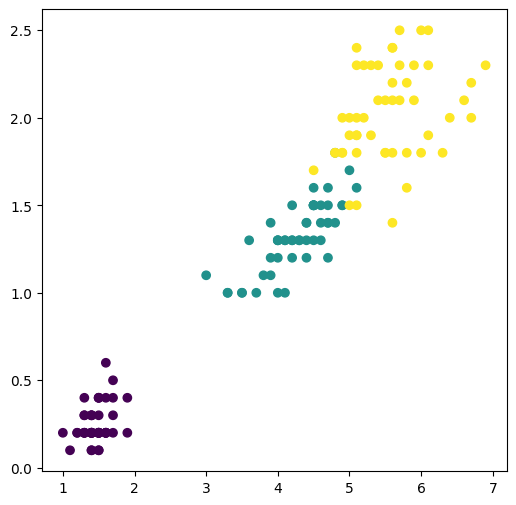

In [9]:
# Visualize our data
plt.figure(figsize=(6,6))
plt.scatter(X[:, 0], X[:, 1], label='class 0', c=y)
plt.show()

## 2. Algorithm

In [10]:
class LogisticRegression:
    
    def __init__(self, k, n, method, alpha = 0.001, max_iter=5000):
        self.k = k
        self.n = n
        self.alpha = alpha
        self.max_iter = max_iter
        self.method = method
    
    def fit(self, X, Y):
        self.W = np.random.rand(self.n, self.k)
        self.losses = []
        
        if self.method == "batch":
            start_time = time.time()
            for i in range(self.max_iter):
                loss, grad =  self.gradient(X, Y)
                self.losses.append(loss)
                self.W = self.W - self.alpha * grad
                if i % 500 == 0:
                    print(f"Loss at iteration {i}", loss)
            print(f"time taken: {time.time() - start_time}")
            
        elif self.method == "minibatch":
            start_time = time.time()
            batch_size = int(0.3 * X.shape[0])
            for i in range(self.max_iter):
                ix = np.random.randint(0, X.shape[0]) #<----with replacement
                batch_X = X[ix:ix+batch_size]
                batch_Y = Y[ix:ix+batch_size]
                loss, grad = self.gradient(batch_X, batch_Y)
                self.losses.append(loss)
                self.W = self.W - self.alpha * grad
                if i % 500 == 0:
                    print(f"Loss at iteration {i}", loss)
            print(f"time taken: {time.time() - start_time}")
            
        elif self.method == "sto":
            start_time = time.time()
            list_of_used_ix = []
            for i in range(self.max_iter):
                idx = np.random.randint(X.shape[0])
                while i in list_of_used_ix:
                    idx = np.random.randint(X.shape[0])
                X_train = X[idx, :].reshape(1, -1)
                Y_train = Y[idx]
                loss, grad = self.gradient(X_train, Y_train)
                self.losses.append(loss)
                self.W = self.W - self.alpha * grad
                
                list_of_used_ix.append(i)
                if len(list_of_used_ix) == X.shape[0]:
                    list_of_used_ix = []
                if i % 500 == 0:
                    print(f"Loss at iteration {i}", loss)
            print(f"time taken: {time.time() - start_time}")
            
        else:
            raise ValueError('Method must be one of the followings: "batch", "minibatch" or "sto".')
        
        
    def gradient(self, X, Y):
        m = X.shape[0]
        h = self.h_theta(X, self.W)
        loss = - np.sum(Y*np.log(h)) / m
        error = h - Y
        grad = self.softmax_grad(X, error)
        return loss, grad

    def softmax(self, theta_t_x):
        return np.exp(theta_t_x) / np.sum(np.exp(theta_t_x), axis=1, keepdims=True)

    def softmax_grad(self, X, error):
        return  X.T @ error

    def h_theta(self, X, W):
        '''
        Input:
            X shape: (m, n)
            w shape: (n, k)
        Returns:
            yhat shape: (m, k)
        '''
        return self.softmax(X @ W)
    
    def predict(self, X_test):
        return np.argmax(self.h_theta(X_test, self.W), axis=1)
    
    def plot(self):
        plt.plot(np.arange(len(self.losses)) , self.losses, label = "Train Losses")
        plt.title("Losses")
        plt.xlabel("epoch")
        plt.ylabel("losses")
        plt.legend()

## 3. Running the algorithm

Loss at iteration 0 0.5591526001399045
Loss at iteration 500 0.3042189663600829
Loss at iteration 1000 0.24892816282971938
Loss at iteration 1500 0.19450420857478704
Loss at iteration 2000 0.12525587704486316
Loss at iteration 2500 0.17382644854630683
Loss at iteration 3000 0.1605955050042508
Loss at iteration 3500 0.14360182395991825
Loss at iteration 4000 0.1325224016194909
Loss at iteration 4500 0.04633178900440892
time taken: 0.06587886810302734
=========Classification report=======
Report:                precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.88      0.94      0.91        16
           2       0.93      0.87      0.90        15

    accuracy                           0.93        45
   macro avg       0.94      0.93      0.94        45
weighted avg       0.93      0.93      0.93        45



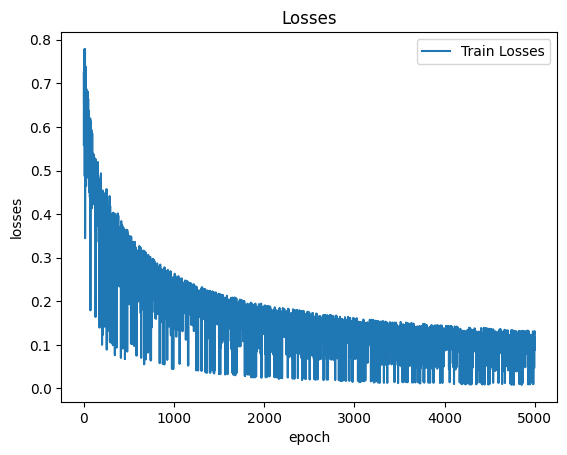

In [11]:
model = LogisticRegression(k, X_train.shape[1], "minibatch")
model.fit(X_train, Y_train_encoded)
yhat = model.predict(X_test)
model.plot()
print("=========Classification report=======")
print("Report: ", classification_report(y_test, yhat))

## Group Workshop - Check your understandings

| | Egg price | Gold price    | Oil price   | Category         |
|---:|:------ |:-----------   |:------      |:------           |  
| 1  | 3      | 1           | 4           | 1                | 
| 2  | 4      | 5           | 7           | 1                | 
| 3  | 5      | 2           | 6           | 2                |
| 4  | 6      | 3           | 8           | 2                |
| 5  | 7      | 4           | 2           | 3                |
| 6  | 8      | 2           | 1           | 3                |

Answer the following questions:

Instruction:  Gather in your group.  Will randomly pick groups to present.

1.  Explain how multinomial logistic regression is slightly different from binary logistic regression.
2.  Why we need `np.exp` in the softmax function?  Why we don't use absolute value instead?
3.  Why do we need to sum across the column, and divide by this sum in the softmax function?
4.  Go home and try to work out the gradient of cross entropy by hand.
5.  Why do we need to have $\log$ in the loss function?
6.  If I have $m=6, n=4, k=3$, what is the shape of $\mathbf{X}$, $\mathbf{Y}$, and $\mathbf{W}$?
7.  Given batch gradient descent based on $\mathbf{X}$, and using **Multinomial Logistic Regression** and $\theta = [[2, -0.1, 3], [-3, 0.2, 1], [3, 1, 0.01]]$
    1.  What is $\mathbf{h}$
    2.  What is $J(\theta)$?
    3.  What is $\displaystyle \frac{\partial J}{\partial \theta_2}$
    4.  What is $\displaystyle \frac{\partial J}{\partial \theta}$
    5.  What would be the new theta?